<a href="https://colab.research.google.com/github/fezilemahlangu/Data-Visualisation-and-Exploration-2022/blob/main/DVE_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# $\textbf{DVE  assignment 2 }$
Group members:

Suraksha Motilal (2108903)

Fezile Mahlangu (2089676)


---



Necessary installations:

In [ ]:
!pip install folium
!pip install Fiona
!pip install Shapely
!pip install geopandas
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 8.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.5 MB/s 
     |████████████████████████████████| 6.3 MB 42.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 407 kB/s 


Imports:

In [ ]:
import numpy as np
import pandas as pd 
import fiona
import shapely 
import geopandas as gpd
import folium
from sklearn.cluster import DBSCAN
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#for geopandas
from shapely.geometry import Point
import contextily as cx

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read in datafile
# df = pd.read_csv('/content/drive/MyDrive/DVE/nyc_taxis.csv')
# display(df)

# img_datas=[plt.imread('/content/drive/MyDrive/DVE/weekdays.png'),plt.imread('/content/drive/MyDrive/DVE/weekends.png'),plt.imread('/content/drive/MyDrive/DVE/mornings.png'),plt.imread('/content/drive/MyDrive/DVE/evenings.png')]

# for submission:
#read in datafile
df=pd.read_csv('nyc_taxis.csv')
display(df)

# read in heatmap images for later use
img_datas=[plt.imread('weekdays.png'),plt.imread('weekends.png'),plt.imread('mornings.png'),plt.imread('evenings.png')]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
def haversine_np(lon1, lat1, lon2, lat2):
  """
  Calculate the great circle distance between two points
  on the earth (specified in decimal degrees)
  All args must be of equal length.
  """
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
  c = 2 * np.arcsin(np.sqrt(a))
  km = 6367 * c
  return km

# 2. Feature generation [3 marks]

This was done before data cleaning, as these generated features were expected to be looked at for the data cleaning



In [ ]:
print(df.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [ ]:
#need to first convert to appropriate datatypes
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

print(df.dtypes)

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object


In [ ]:
# add speed column
dayOfWeek=df['dropoff_datetime'].dt.day_name()
# add speed column
df.insert(len(df.columns), 'dayOfWeek',dayOfWeek)

# distance= haversine distance
distance=haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])
# add distance column
df.insert(len(df.columns), 'distance',distance)

# change seconds to hours:
hours=df['trip_duration']/3600

# speed=distance / time
# make speed km/h
speed= df['distance']/hours 
# add speed column
df.insert(len(df.columns), 'speed',speed)



The following columns were added to the dataframe
- day of week= day of week of pickup_datetime
- distance= haversine distance
- speed= km/h - distance/duration in hours

In [ ]:
display(df)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dayOfWeek,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,1.497580,11.848984
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,1.804374,9.797504
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,6.381090,10.815406
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,1.484566,12.457894
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,1.187842,9.830418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,1.224311,5.665192
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,6.046037,33.230128
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,7.819693,36.846722
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,1.091878,10.538232


# 1. Data Cleaning
There are several outliers in the data. Identify these and give justification for why you can remove them
from the analysis. (Hint: look at trip duration, speed, distance, etc). [3 marks]


\============================

This was done after feature generation as the features generated were better for checking of outliers rather than the original data.



In [ ]:

origdf=df.copy()

Original size of dataset 					: 1458644
Size of dataset after removal of trip duration outliers		: 1458640
Size of dataset after removal of speed outliers			: 1458581
Size of dataset after removal of distance outliers		: 1458576
Size of dataset after removal of pickup longitude outliers	: 1458488
Size of dataset after removal of dropoff longitude outliers	: 1458485
Size of dataset after removal of dropoff latitude outliers	: 1458470
Size of dataset after removal of pick up latitude outliers	: 1458461 




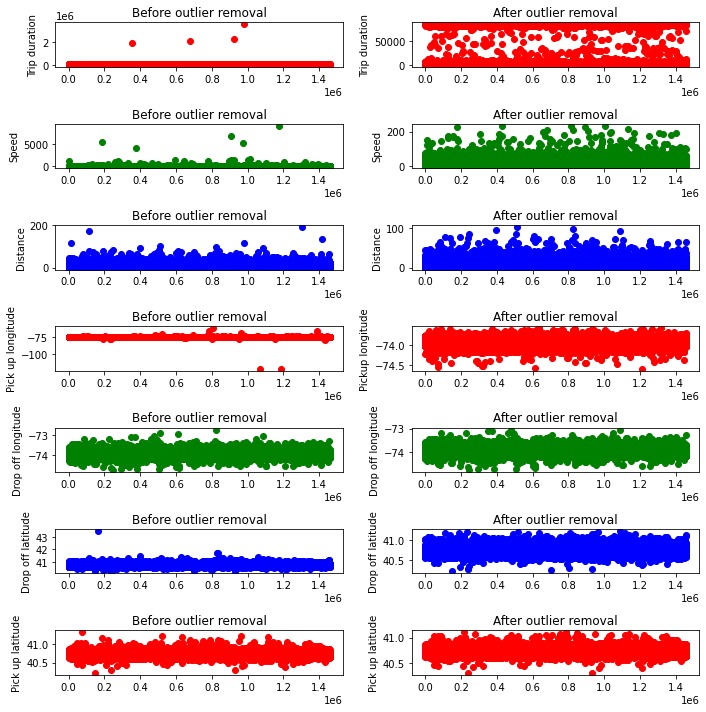

In [ ]:
df=origdf.copy()

# ==============================================================================
# REMOVAL OF TRIP DURATION OUTLIERS
print('Original size of dataset \t\t\t\t\t:',len(df))

xRange=np.arange(0,len(origdf))
fig, axes= plt.subplots(nrows=7, ncols=2, figsize=(10,10),)
axes[0][0].plot(xRange,df['trip_duration'], 'o',c='r')
axes[0][0].set_ylabel('Trip duration')
axes[0][0].set_title('Before outlier removal')

# remove outliers:
for i in range(4):
  df=df.loc[df['trip_duration']!=df['trip_duration'].max()]

xRange=np.arange(0,len(df))
axes[0][1].plot(xRange,df['trip_duration'], 'o',c='r')
axes[0][1].set_ylabel('Trip duration')
axes[0][1].set_title('After outlier removal')



print('Size of dataset after removal of trip duration outliers\t\t:',len(df))

# ==============================================================================
# REMOVAL OF SPEED OUTLIERS
xRange=np.arange(0,len(df))
axes[1][0].plot(xRange,df['speed'], 'o',c='g')
axes[1][0].set_ylabel('Speed')
axes[1][0].set_title('Before outlier removal')

# remove higher quartiles which contain outliers
qb = df['speed'].quantile(0.99996) #higher percentile
df = df[ (df['speed'] <= qb)]

print('Size of dataset after removal of speed outliers\t\t\t:',len(df))

xRange=np.arange(0,len(df))
axes[1][1].plot(xRange,df['speed'], 'o',c='g')
axes[1][1].set_ylabel('Speed')
axes[1][1].set_title('After outlier removal')

# ==============================================================================
# REMOVAL OF DISTANCE OUTLIERS
xRange=np.arange(0,len(df))
axes[2][0].plot(xRange,df['distance'], 'o',c='b')
axes[2][0].set_ylabel('Distance')
axes[2][0].set_title('Before outlier removal')

for i in range(5):
  df=df.loc[df['distance']!=df['distance'].max()]
print('Size of dataset after removal of distance outliers\t\t:',len(df))

xRange=np.arange(0,len(df))
axes[2][1].plot(xRange,df['distance'], 'o',c='b')
axes[2][1].set_ylabel('Distance')
axes[2][1].set_title('After outlier removal')

# ==============================================================================
# REMOVAL OF PICK UP LONGITUDE OUTLIERS
xRange=np.arange(0,len(df))
axes[3][0].plot(xRange,df['pickup_longitude'], 'o',c='r')
axes[3][0].set_ylabel('Pick up longitude')
axes[3][0].set_title('Before outlier removal')

# remove higher and lower quartiles which contain outliers
qb = df['pickup_longitude'].quantile(0.99995) #higher percentile
df = df[ (df['pickup_longitude'] <= qb)]
qb = df['pickup_longitude'].quantile(0.00001) #higher percentile
df = df[ (df['pickup_longitude'] >= qb)]

print('Size of dataset after removal of pickup longitude outliers\t:',len(df))

xRange=np.arange(0,len(df))
axes[3][1].plot(xRange,df['pickup_longitude'], 'o',c='r')
axes[3][1].set_ylabel('Pickup longitude')
axes[3][1].set_title('After outlier removal')
# ==============================================================================
# REMOVAL OF DROP OFF LONGITUDE OUTLIERS
xRange=np.arange(0,len(df))
axes[4][0].plot(xRange,df['dropoff_longitude'], 'o',c='g')
axes[4][0].set_ylabel('Drop off longitude')
axes[4][0].set_title('Before outlier removal')

# # remove higher and lower quartiles which contain outliers
qb = df['dropoff_longitude'].quantile(0.9995) #higher percentile
df = df[ (df['dropoff_longitude'] <= -73)]
# qb = df['dropoff_longitude'].quantile(0.00019) #higher percentile
# df = df[ (df['dropoff_longitude'] >= qb)]

print('Size of dataset after removal of dropoff longitude outliers\t:',len(df))

xRange=np.arange(0,len(df))
axes[4][1].plot(xRange,df['dropoff_longitude'], 'o',c='g')
axes[4][1].set_ylabel('Drop off longitude')
axes[4][1].set_title('After outlier removal')
# ==============================================================================
# REMOVAL OF DROP OFF LATITUDE OUTLIERS
xRange=np.arange(0,len(df))
axes[5][0].plot(xRange,df['dropoff_latitude'], 'o',c='b')
axes[5][0].set_ylabel('Drop off latitude')
axes[5][0].set_title('Before outlier removal')

# remove lower quartiles which contain outliers
qb = df['dropoff_latitude'].quantile(0.99999) #higher percentile
df = df[ (df['dropoff_latitude'] <= qb)]

print('Size of dataset after removal of dropoff latitude outliers\t:',len(df))

xRange=np.arange(0,len(df))
axes[5][1].plot(xRange,df['dropoff_latitude'], 'o',c='b')
axes[5][1].set_ylabel('Drop off latitude')
axes[5][1].set_title('After outlier removal')
# ==============================================================================
# REMOVAL OF PICKUP LATITUDE OUTLIERS
xRange=np.arange(0,len(df))
axes[6][0].plot(xRange,df['pickup_latitude'], 'o',c='r')
axes[6][0].set_ylabel('Pick up latitude')
axes[6][0].set_title('Before outlier removal')

# remove higher and lower quartiles which contain outliers
qb = df['pickup_latitude'].quantile(0.999995) #higher percentile
df = df[ (df['pickup_latitude'] <= qb)]
qb = df['pickup_latitude'].quantile(0.000001) #higher percentile
df = df[ (df['pickup_latitude'] >= qb)]

# for i in range(5):
#   df=df.loc[df['distance']!=df['distance'].max()]
print('Size of dataset after removal of pick up latitude outliers\t:',len(df),'\n\n')

xRange=np.arange(0,len(df))
axes[6][1].plot(xRange,df['pickup_latitude'], 'o',c='r')
axes[6][1].set_ylabel('Pick up latitude')
axes[6][1].set_title('After outlier removal')
# ==============================================================================
# plot all of the scatterplots
plt.tight_layout()
plt.show()


With regard to the longitude and latitude, some of the points are very far out and can be seen to be outliers, as they do not lie in the region of where NYC is. The distance, speed and trip duration also have several outliers which can be seen in the graphs plotted, and are very large in values thus were removed as they would skew the data unnecessarily. The speed outliers seem to be data capturing errors.

#3. Time-based [14 marks]
Assume pickup time unless otherwise specified.
1. Which day of the week is the most popular? Show plots to motivate your answer. [2 marks]



Total counts:



Friday       223006
Saturday     220885
Thursday     217719
Wednesday    209764
Tuesday      202496
Sunday       197187
Monday       187404
Name: dayOfWeek, dtype: int64

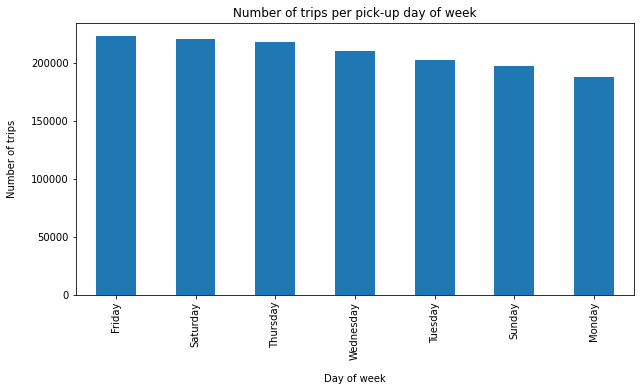

In [ ]:
print('Total counts:\n')
display(df['dayOfWeek'].value_counts())
print('=========================')
df['dayOfWeek'].value_counts().plot.bar()
plt.xlabel("Day of week", labelpad=14)
plt.ylabel("Number of trips", labelpad=14)
plt.title("Number of trips per pick-up day of week");

Friday is the most popular day of the week with the highest number of records (223006).

2. What hour of the day is the most popular on each day? Plot a distributions of the hours and make
observations and give possible suggestions for why the data looks like it does. [3 marks]



Most popular hour of day of week:



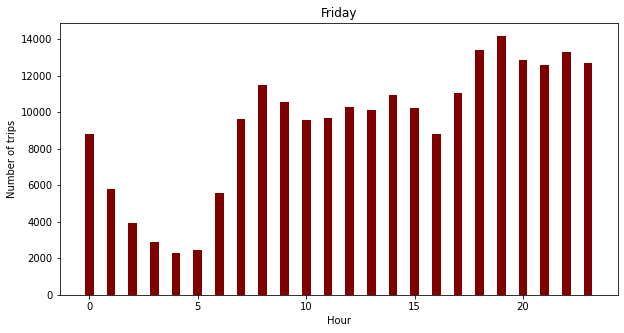


Most popular hour on a Friday is 19 : 00



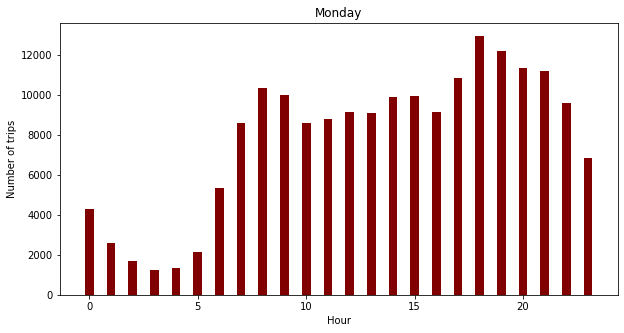


Most popular hour on a Monday is 18 : 00



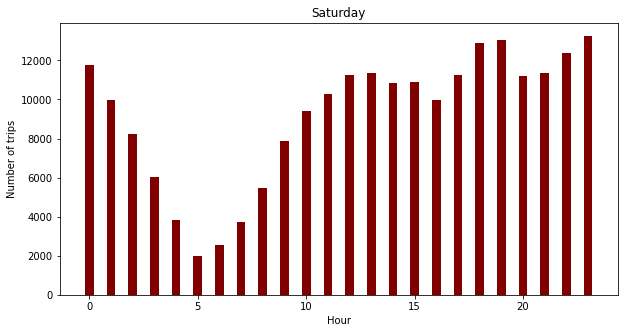


Most popular hour on a Saturday is 23 : 00



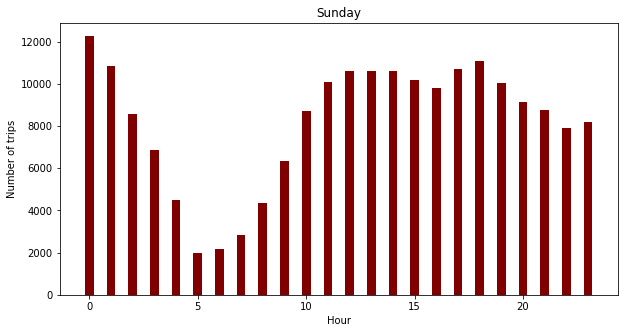


Most popular hour on a Sunday is 0 : 00



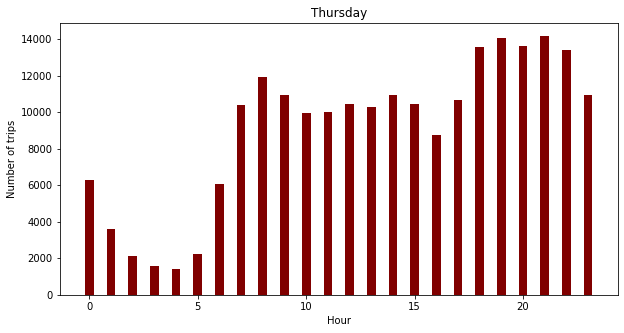


Most popular hour on a Thursday is 21 : 00



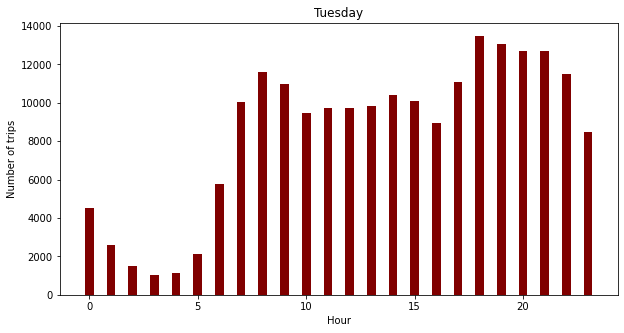


Most popular hour on a Tuesday is 18 : 00



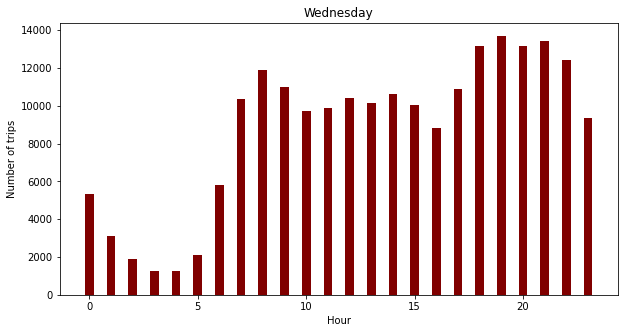


Most popular hour on a Wednesday is 19 : 00



In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
# insert temporary dt.hour column
hours=df['pickup_datetime'].dt.hour
tempDF=df.copy()
tempDF.insert(len(tempDF.columns), 'hours',hours)
maxTimes=tempDF.groupby(['dayOfWeek','hours'], as_index = False).size()

daysofWeek=(maxTimes['dayOfWeek'].unique())
print("Most popular hour of day of week:\n")
count=0

thing=[]
for i in daysofWeek:
  # get max hour per day of week
  day= maxTimes[maxTimes['dayOfWeek']==i]['size'].max()
  hour=maxTimes.loc[(maxTimes['dayOfWeek'] ==i) & (maxTimes['size'] == day)]

  hours=maxTimes[maxTimes['dayOfWeek']==i]
  thing.append(hours['size'])

  count=count+1
  #creating the bar plot
  plt.bar(hours['hours'], hours['size'], color ='maroon',
          width = 0.4)
  
  plt.ylabel("Number of trips")
  plt.xlabel("Hour")
  plt.title(i)

  plt.show()
  print("\nMost popular hour on a",i,"is",hour['hours'].values[0],": 00\n==========================================\n")


The amount of trips during the daytime on weekdays are not as high as it could be due to people working or going to school. Trips are also not as popular during the later hours of the night on Sundays due to people working and kids having school. Trips at midnight until 5 am are also not as much on weekdays due to this, as people need to sleep and wake up early for work/ school. From 6am the numbers pick up as people need to go to work/ school.

Friday nights also have a lot of trips as it is the start to the weekend and people can stay out late. Saturday and Sunday mornings are popular as people generally do not have commitments or have to wake up early, thus can travel as late as they want. 

3. Investigate the differences between weekdays and weekends. What would account for this? [2
marks]

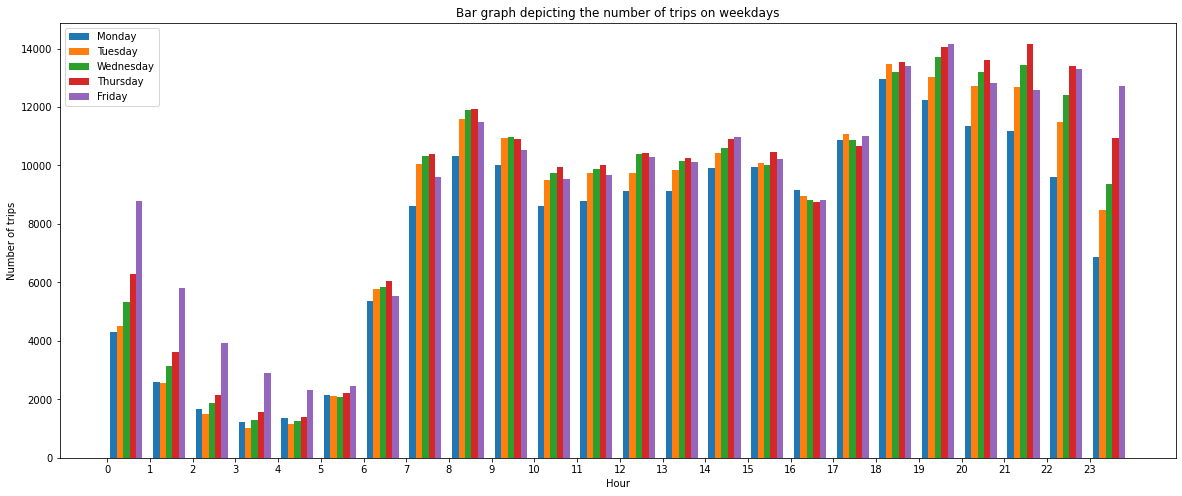

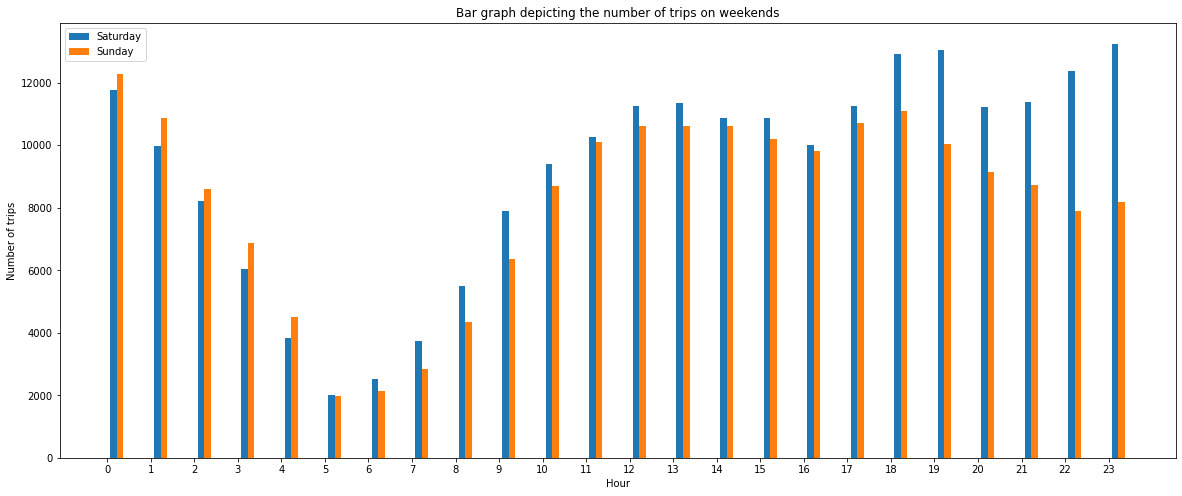

In [ ]:

r = np.arange(24)
width = 0.15
plt.rcParams["figure.figsize"] = (20,8)

plt.bar(r + width*1,  thing[1], width=width,label=daysofWeek[1])
plt.bar(r + width*2,  thing[5], width=width,label=daysofWeek[5])
plt.bar(r + width*3,  thing[6], width=width,label=daysofWeek[6])
plt.bar(r + width*4,  thing[4], width=width,label=daysofWeek[4])
plt.bar(r + width*5,  thing[0], width=width,label=daysofWeek[0])
plt.title('Bar graph depicting the number of trips on weekdays')
plt.ylabel("Number of trips")
plt.xlabel("Hour")
plt.xticks(r, r)



plt.legend()
plt.show()


plt.rcParams["figure.figsize"] = (20,8)
plt.bar(r + width*1,  thing[2], width=width,label=daysofWeek[2])
plt.bar(r + width*2,  thing[3], width=width,label=daysofWeek[3])
plt.xticks(r, r)
plt.legend()
plt.title('Bar graph depicting the number of trips on weekends')
plt.ylabel("Number of trips")
plt.xlabel("Hour")
plt.show()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


There are more trips during the afternoon on weekdays, which is most probably due to people working/ going to school during the day. The trips are also constant during the day on weekends due to many people not working on weekends, however, Sunday nights do not have as many trips as people need to sleep early and get ready for the work week as compared to Saturday. Friday nights are also similar to Saturday nights, as people can stay out late due to not working the next day.


4. Look at how these patterns change on the major holidays (do they change?). Look at the following:
St. Patrick’s Day, Easter, Memorial Day, Valentine’s Day, Martin Luther King Day. Make sure you use
the correct dates for these for the relevant year. [5 marks]

In [ ]:
def plotHrs(tempDF,title):
  plt.rcParams["figure.figsize"] = (10,5)
  maxTimes=tempDF.groupby(['hours'], as_index = False).size()
    # creating the bar plot
  plt.bar(maxTimes['hours'], maxTimes['size'], color ='maroon',
          width = 0.4)
  
  plt.ylabel("Number of trips")
  plt.xlabel("Hour")
  plt.title(title)

  plt.show()
  plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]



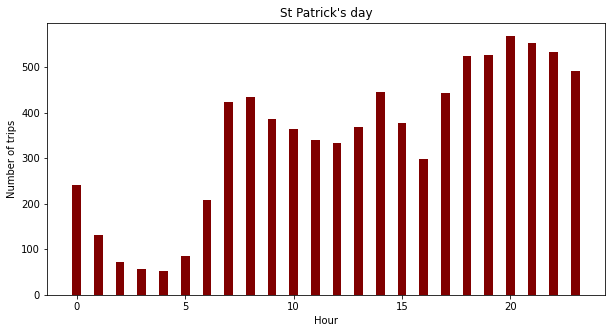

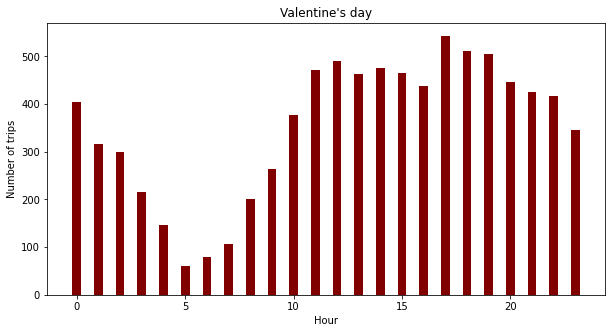

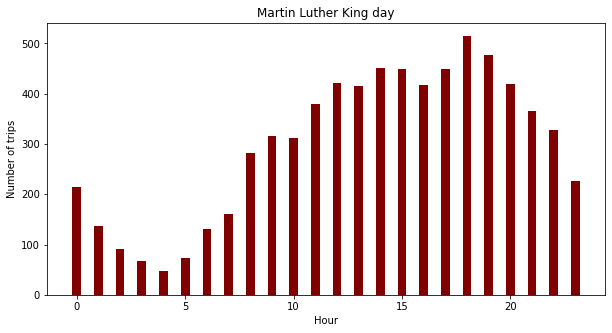

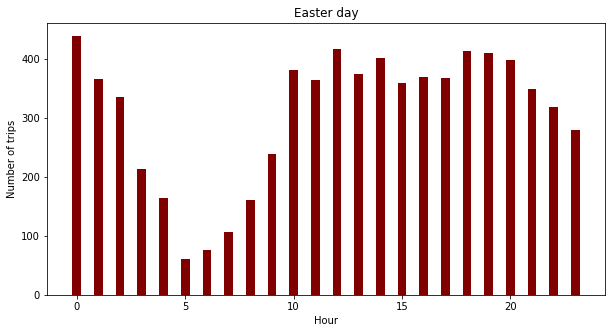

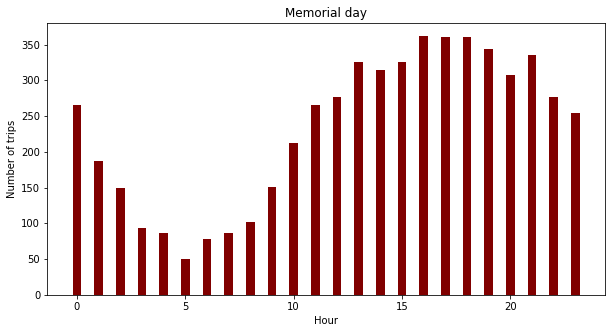

In [ ]:
# so as to not affect the original df
hours=df['pickup_datetime'].dt.hour
tempDF=df.copy()
tempDF.insert(len(tempDF.columns), 'hours',hours)

# st patrick's day- 17 march 2016
stPatrick=tempDF[tempDF['pickup_datetime'].dt.month==3]
stPatrick=stPatrick[stPatrick['pickup_datetime'].dt.day==17]
plotHrs(stPatrick, "St Patrick's day")

# valentine's day- 14 february 2016
valDay=tempDF[tempDF['pickup_datetime'].dt.month==2]
valDay=valDay[valDay['pickup_datetime'].dt.day==14]
plotHrs(valDay, "Valentine's day")

# Martin luther king day- 3rd monday of jan was 18 jan in 2016
mlk=tempDF[tempDF['pickup_datetime'].dt.month==1]
mlk=mlk[mlk['pickup_datetime'].dt.day==18]
plotHrs(mlk, "Martin Luther King day")

# easter: first sunday after full moon-27 march 2016
easter=tempDF[tempDF['pickup_datetime'].dt.month==3]
easter=easter[easter['pickup_datetime'].dt.day==27]
plotHrs(easter, "Easter day")

# mem day: 30 may 2016
memDay=tempDF[tempDF['pickup_datetime'].dt.month==5]
memDay=memDay[memDay['pickup_datetime'].dt.day==30]
plotHrs(memDay, "Memorial day")


Valentine's day fell on a Sunday in 2016, thus it was still similar to the weekend pattern: there are a lot of early morning trips since people can sleep late. However, it does not follow the general Sunday pattern in the night time, as people are possibly leaving their partner's houses late, wanting to spend more time with them.

Martin Luther King day always falls on a Monday, thus the graph is very similar to that of a normal working day. It is also not mandatory for companies to give people days off on this day, thus follows a normal weekday pattern. 

The same can be said for St Patrick's day, which is not a federal holiday and falls on a Thursday. Possibly due to people celebrating it into the late hours of the night, the number of trips are more at midnight compared to MLK day.

Easter and Memorial day are public holidays, in which schools and many businesses are closed, thus follows the weekend pattern. 





5. How does the average speed of trips change throughout the day? What time of day are trips fastest?
Show plots to motivate your answer. [2 marks]

    hours      speed
0       0  17.631884
1       1  18.357511
2       2  18.788507
3       3  19.833321
4       4  21.985111
5       5  24.285792
6       6  20.467620
7       7  15.718862
8       8  12.934714
9       9  12.607403
10     10  12.744312
11     11  12.392000
12     12  12.215149
13     13  12.395766
14     14  12.178947
15     15  12.056089
16     16  12.531430
17     17  12.468989
18     18  12.509860
19     19  13.551163
20     20  15.106725
21     21  15.744969
22     22  15.963340
23     23  16.828143 




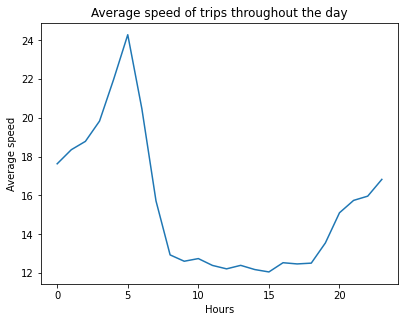

In [ ]:
hours=df['pickup_datetime'].dt.hour
tempDF=df.copy()
tempDF.insert(len(tempDF.columns), 'hours',hours)
avgSpeed=tempDF.groupby('hours', as_index = False)['speed'].mean()
print(avgSpeed,'\n\n')
# Draw a scatter plot
plt.xlabel('Hours')
plt.ylabel('Average speed')
plt.title('Average speed of trips throughout the day')
plt.plot(avgSpeed['hours'], avgSpeed['speed'])

5am is the fastest trip time, possibly as people are rushing to work/ school. The speed decreases as the day progresses, as people are not in as much of a rush.

#4 Location clusters [12 marks]
4.1 Heatmaps
Produce a heatmap of all of the trip pickups over (do not do a scatter plot... there are 1.5 million data
points and this will almost certainly crash your computer):
1. weekdays and weekends,
2. morning and evening (choose reasonable hours).
Comment on any findings you make. [4 marks]


In [ ]:
df.dtypes


id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dayOfWeek                     object
distance                     float64
speed                        float64
dtype: object

In [ ]:
# import relevant data for heatmap mapping
from folium import plugins
from folium.plugins import HeatMap


WEEKDAY HEATMAP:

In [ ]:

# lat and longitude for just the weekdays
weekdays=df[df["dayOfWeek"].str.contains("Monday|Tuesday|Wednesday|Thursday|Friday")]
print(weekdays)


In [ ]:
# could not make a generic function for this repetitive code because it would not display the heatmap

nycMap = folium.Map(location=[40.716662, -74.009899], zoom_start = 10)
heat_df = weekdays[['pickup_latitude', 'pickup_longitude']]
# change to data the map can work with
heat_data = [[row['pickup_latitude'],row['pickup_longitude']] for index, row in heat_df.iterrows()]
# add locations to map as a heatmap
HeatMap(heat_data).add_to(nycMap)
# display the map:
nycMap

WEEKEND HEATMAP:

In [ ]:
# lat and longitude for just the weekends
weekends=df[df["dayOfWeek"].str.contains("Saturday|Sunday")]
print(weekends)


In [ ]:
nycMap = folium.Map(location=[40.716662, -74.009899], zoom_start = 10)
heat_df = weekends[['pickup_latitude', 'pickup_longitude']]
# change to data the map can work with
heat_data = [[row['pickup_latitude'],row['pickup_longitude']] for index, row in heat_df.iterrows()]
# add locations to map as a heatmap
HeatMap(heat_data).add_to(nycMap)
# display the map:
nycMap

MORNING HEATMAP (5am to 12pm):

In [ ]:
# lat and longitude for just the mornings
copydf=df.copy()

# extract only certain columns from the original df
copydf=df[['pickup_datetime','pickup_latitude','pickup_longitude']]
# set time column as index
copydf.index = copydf['pickup_datetime']
# extract records where time is from 5am to 12pm
mornings=copydf.between_time('5:00', '12:00')
display(mornings)


,pickup_datetime,pickup_latitude,pickup_longitude
pickup_datetime,,,
2016-01-19 11:35:24,2016-01-19 11:35:24,40.763939,-73.979027
2016-05-21 07:54:58,2016-05-21 07:54:58,40.797779,-73.969276
2016-05-15 11:16:11,2016-05-15 11:16:11,40.749439,-73.991531
2016-02-19 09:52:46,2016-02-19 09:52:46,40.756680,-73.962982
2016-04-14 08:48:26,2016-04-14 08:48:26,40.745804,-73.994255
...,...,...,...
2016-06-24 10:33:51,2016-06-24 10:33:51,40.808941,-73.959618
2016-03-06 11:04:48,2016-03-06 11:04:48,40.710892,-74.015572
2016-02-12 10:13:06,2016-02-12 10:13:06,40.769684,-73.863815


In [ ]:
# display morning heatmap

nycMap = folium.Map(location=[40.716662, -74.009899], zoom_start = 10)
heat_df = mornings[['pickup_latitude', 'pickup_longitude']]
# change to data the map can work with
heat_data = [[row['pickup_latitude'],row['pickup_longitude']] for index, row in heat_df.iterrows()]
# add locations to map as a heatmap
HeatMap(heat_data).add_to(nycMap)
# display the map:
nycMap

EVENING HEATMAP (5pm to 9pm):

In [ ]:
# lat and longitude for just the evenings
copydf=df.copy()

# extract only certain columns from the original df
copydf=df[['pickup_datetime','pickup_latitude','pickup_longitude']]
# set time column as index
copydf.index = copydf['pickup_datetime']
# extract records where time is from 5am to 12pm
evenings=copydf.between_time('17:00', '21:00')
display(evenings)

,pickup_datetime,pickup_latitude,pickup_longitude
pickup_datetime,,,
2016-03-14 17:24:55,2016-03-14 17:24:55,40.767937,-73.982155
2016-04-06 19:32:31,2016-04-06 19:32:31,40.719971,-74.010040
2016-06-01 20:58:29,2016-06-01 20:58:29,40.767941,-73.956306
2016-04-11 17:29:50,2016-04-11 17:29:50,40.755562,-73.991165
2016-05-10 19:27:38,2016-05-10 19:27:38,40.706589,-74.005501
...,...,...,...
2016-01-18 20:35:30,2016-01-18 20:35:30,40.737408,-73.991081
2016-01-25 17:21:15,2016-01-25 17:21:15,40.740612,-73.989655
2016-01-17 17:21:11,2016-01-17 17:21:11,40.767021,-73.954071


In [ ]:
# display evening heatmap

nycMap = folium.Map(location=[40.716662, -74.009899], zoom_start = 10)
heat_df = evenings[['pickup_latitude', 'pickup_longitude']]
# change to data the map can work with
heat_data = [[row['pickup_latitude'],row['pickup_longitude']] for index, row in heat_df.iterrows()]
# add locations to map as a heatmap
HeatMap(heat_data).add_to(nycMap)
# display the map:
nycMap

COMMENTS ON THE FINDINGS:

---

As we were working on Google Colab which restricted us from running the heatmap code due to RAM issues, the heatmap code was run locally and screenshots were taken, which is plotted below. This made it easier for us to comment on the results, as viewing the huge heatmaps which zoomed in and out were inconvenient as you had to continuously scroll through the code to look at the maps and compare results.

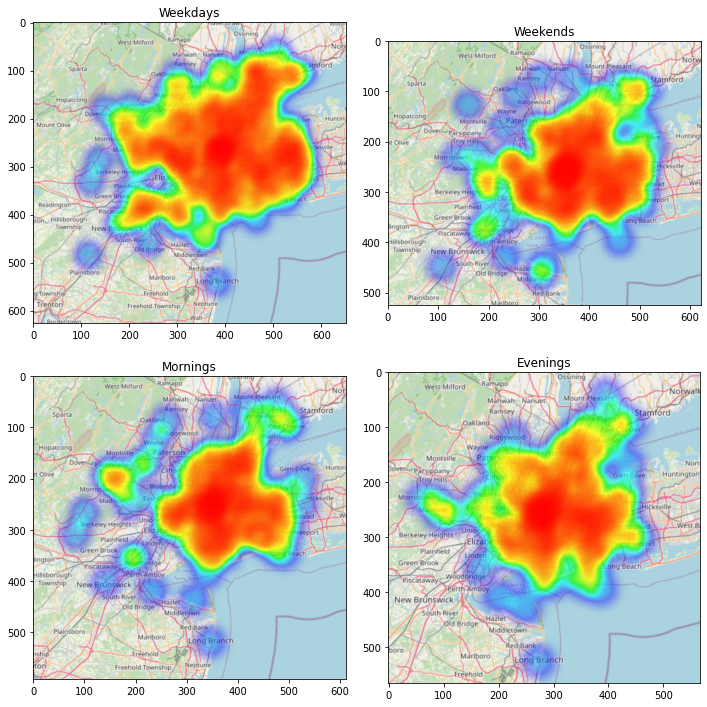

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Weekdays')
ax2.title.set_text('Weekends')
ax3.title.set_text('Mornings')
ax4.title.set_text('Evenings')

plt.tight_layout()
ax1.imshow(img_datas[0])
ax2.imshow(img_datas[1])
ax3.imshow(img_datas[2])
ax4.imshow(img_datas[3])


- On Weekdays, people are moving to and from work or school, which means that they are traveling from all around New York to go to their destinations and get picked up from them again in the evening. Their pick-up locations are very spread out, and the regions where the workplaces are are in the central region of New York, which is the intense red area on the map. People also travel the most on weekdays.

- On Weekends, it is not as spread out as people seem to not want to travel as much, possibly due to wanting to rest from the work week. There are darker coloured densities compared to the weekday trips in outer corners of the map (namely MiddleTown), outside the work region, meaning that people are also traveling from the outskirts of NYC on weekends compared to on weekdays.

- The mornings are not as busy as the evenings, and it seems that most people get picked up in the central region of New York, which is possibly where most of the housing is. They then move to more spread out outer locations in New York (the destinations, which are not plotted). The outer regions are most likely where a lot of the businesses or schools are, as well as in the inner regions, where they get picked up from in the evenings. This explains why the heatmap is spread out more in the evenings. People who are not working or schooling as well are also more likely to travel in the evenings, which explains why the evening heatmap is larger than the morning heatmap.

#5 Airports [9 marks]

Find out how long it takes, on average, to travel to JFK airport from the Empire State Building. Produce
a plot showing the travel time by time of day. How does this compare with Newark Airport?

A radius of 1km is used to determine whether a GPS coordinate is the required location. 



In [ ]:
#constants 

#swaped longitude and latitude because of inconsistencies in pdf and csv 
JFK_Lon=-73.777813
JFK_Lat=40.647929
EmpireState_Lon=-73.983806
EmpireState_Lat=40.756724
Newark_Lon=-74.173242
Newark_Lat=40.689442

average=0
num=0

Nnum=0
Naverage=0

JFKTimeDf = pd.DataFrame(columns=['id','pickup_datetime','dropoff_datetime','trip_duration'])
NewarkTimeDf = pd.DataFrame(columns=['id','pickup_datetime','dropoff_datetime','trip_duration'])

for i in range(len(df)):
  pickupdist = haversine_np(EmpireState_Lon,EmpireState_Lat,df.iloc[i]['pickup_longitude'],df.iloc[i]['pickup_latitude']) 
  dropoffdistJFK =haversine_np(JFK_Lon,JFK_Lat,df.iloc[i]['dropoff_longitude'],df.iloc[i]['dropoff_latitude'])
  dropoffdistNewark =haversine_np(Newark_Lon,Newark_Lat,df.iloc[i]['dropoff_longitude'],df.iloc[i]['dropoff_latitude'])

  if(pickupdist<=1 and dropoffdistJFK<=1): #Empire State building to JFK airport 
    average+=df.iloc[i]['trip_duration'] 
    num+=1
    JFKTimeDf = JFKTimeDf.append({'id': df.iloc[i]['id'],'pickup_datetime':df.iloc[i]['pickup_datetime'],'dropoff_datetime':df.iloc[i]['dropoff_datetime'],'trip_duration':df.iloc[i]['trip_duration']}, ignore_index=True)
  
  elif(pickupdist<=1 and dropoffdistNewark<=1):#Empire State building to Newark airport 
    Naverage+=df.iloc[i]['trip_duration'] 
    Nnum+=1
    NewarkTimeDf = NewarkTimeDf.append({'id': df.iloc[i]['id'],'pickup_datetime':df.iloc[i]['pickup_datetime'],'dropoff_datetime':df.iloc[i]['dropoff_datetime'],'trip_duration':df.iloc[i]['trip_duration']}, ignore_index=True)
print(f"The total average of time traveled from the Empire state building to JFK airport is {average/num} seconds")
print(f"The total average of time traveled from the Empire state building to Newark airport is {Naverage/Nnum} seconds")








The total average of time traveled from the Empire state building to JFK airport is 3009.8073054526203 seconds
The total average of time traveled from the Empire state building to Newark airport is 2377.2426470588234 seconds


In [ ]:
print(num)
print(Nnum)

1889
816


In [ ]:
def PlotQ5(index1,index2,df,t,c):
  group=df[index1:index2]
  xval=group['pickup_time'] #xvalues for line graph
  yval=group['trip_duration'] #yavlues for line graph

  #PLOT LINE GRAPH
  dfPlot = pd.DataFrame({'Time of day':xval, 'Duration (seconds)':yval}) #creates a dataframe 
  lines = dfPlot.plot.bar(x='Time of day', y='Duration (seconds)',title=t,color =c)


  plt.xlabel("Time of day (hour)") #sets x axis 
  plt.ylabel("Duration (seconds)") #sets y axis 


/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


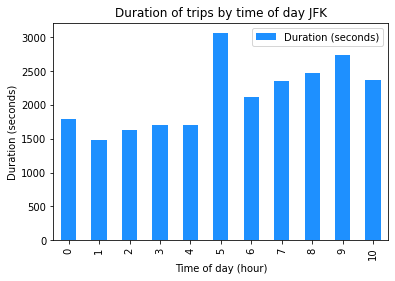

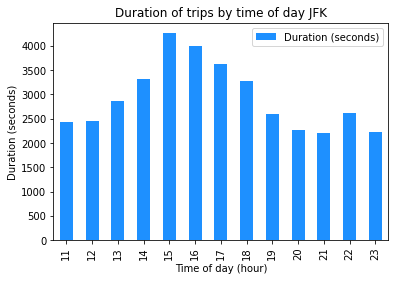

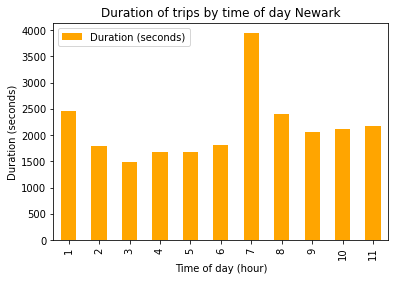

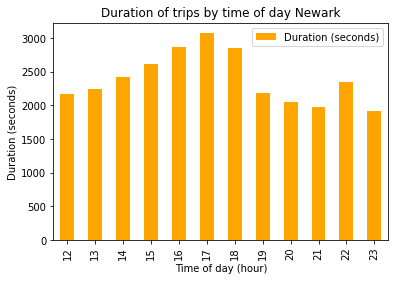

In [ ]:
#JFK
JFKTimeDf['pickup_time']= JFKTimeDf['pickup_datetime'].dt.hour  #extracts the time from pickup_datetime 

JFKTimeDf=JFKTimeDf.sort_values(by='pickup_time',ascending=True) #sort by time

gGraph=JFKTimeDf.groupby(['pickup_time'],as_index=False).agg('mean') #groups by time and evaluates the average of each column 

PlotQ5(0,11,gGraph,"Duration of trips by time of day JFK","dodgerblue")

PlotQ5(11,len(gGraph),gGraph,"Duration of trips by time of day JFK","dodgerblue")

#Newark

NewarkTimeDf['pickup_time']= NewarkTimeDf['pickup_datetime'].dt.hour #extracts the time from pickup_datetime 
 
NewarkTimeDf=NewarkTimeDf.sort_values(by='pickup_time',ascending=True) #sort by time

NgGraph=NewarkTimeDf.groupby(['pickup_time'],as_index=False).agg('mean') #groups by time and evaluates the average of each column 

PlotQ5(0,11,NgGraph,"Duration of trips by time of day Newark","orange")
PlotQ5(11,len(NgGraph),NgGraph,"Duration of trips by time of day Newark","orange")







In [ ]:
def plotComparisonQ5(index1,index2,df1,df2):

  JFKgroup=df1[index1:index2]
  Newarkgroup=df2[index1:index2]

  X= JFKgroup['pickup_time']
  Xvalues2= Newarkgroup['pickup_time']

  Yvalues1= JFKgroup['trip_duration']
  Yvalues2= Newarkgroup['trip_duration']

  n=index2-index1
  # print(n)
  r = np.arange(n)
  width = 0.25
    
    
  plt.bar(r, Yvalues1, color = 'dodgerblue',
          width = width,
          label='JFK')
  plt.bar(r + width, Yvalues2, color = 'orange',
          width = width,
          label='Newark')
    
  plt.xlabel("Time of day (hour)")
  plt.ylabel("Average duration of trip (seconds)")
  plt.title("Duration of trips by time of day ")
    
  # plt.grid(linestyle='--')
  plt.xticks(r + width/2,X)
  plt.legend()
    
  # plt.show()


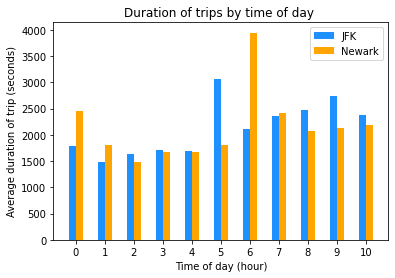

In [ ]:
plotComparisonQ5(0,11,gGraph,NgGraph)




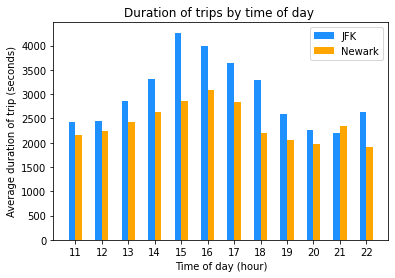

In [ ]:
plotComparisonQ5(11,len(NgGraph),gGraph,NgGraph)

The average duration to JFK airport compared to Newark airport is longer especially around 3-4pm and 5am. The duration to Newark is significantly longer around 6am and midnight, but besides that, the duration to Newark is consistently lower throughout the day. 
Compared to the JFK airport, the average travel time to Newark airport from Empire State building is smaller.  

#6 Boroughs [11 marks]




###1. Using this shapefile find the neighbourhoods for the trip start and end locations (try geopandas,shapely, or fiona, for example) [3 marks]



In [ ]:
nyc = gpd.read_file('/content/geo_export_9aaef177-6cc5-477f-8418-3386d80abbe5.shp')

nyc = n= gpd.read_file('/content/boroughs.shp') #shorter borough dataframe 
print(nyc)

   boro_code      boro_name    shape_area     shape_leng  \
0        4.0         Queens  3.040206e+09  900269.280485   
1        3.0       Brooklyn  1.934167e+09  728477.954082   
2        5.0  Staten Island  1.623631e+09  325924.002076   
3        1.0      Manhattan  6.366208e+08  359993.126318   
4        2.0          Bronx  1.187194e+09  463868.599917   

                                            geometry  
0  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...  
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
2  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  


Reference https://www.kaggle.com/code/muonneutrino/nyc-taxis-eda-and-mapping-position-to-borough/data?select=nyc_census_tracts.csv

In [ ]:
def get_data():
    blocks = pd.read_csv('/content/drive/MyDrive/DVE/census_block_loc.csv')
    census = pd.read_csv('/content/drive/MyDrive/DVE/nyc_census_tracts.csv',index_col=0)
    blocks['Tract'] = blocks.BlockCode // 10000
    blocks = blocks.merge(census,how='left',left_on='Tract',right_index=True)
    return blocks,census

def convert(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200],'l')
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

blocks,census = get_data()
blocks_tmp = blocks[blocks.County_x.isin(['Bronx','Kings','New York','Queens','Richmond'])]
map_lats, map_lons,map_tracts_nyc = convert(blocks_tmp.Latitude,blocks_tmp.Longitude,blocks_tmp.Tract)
map_lats, map_lons,map_tracts = convert(blocks.Latitude,blocks.Longitude,blocks.Tract)





In [ ]:
fips_codes = {36061:'Manhattan',36081:'Queens',36047:'Brooklyn',
              36005:'Bronx',36085:'Staten Island',0:'Unknown'}

In [ ]:
def get_tract(lat,lon):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    dlat = (latmax-latmin) / 199
    dlon = (lonmax-lonmin) / 199
    if (latmin<lat<latmax) and (lonmin<lon<lonmax):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon )) 
        return map_tracts[lon_idx,lat_idx]
    return 0

In [ ]:
df['pickup_tracts'] = np.array([get_tract(lat,lon) for lat,lon in zip(df.pickup_latitude,df.pickup_longitude)])
df['dropoff_tracts'] = np.array([get_tract(lat,lon) for lat,lon in zip(df.dropoff_latitude,df.dropoff_longitude)])


In [ ]:
df['Pickup_Borough'] =  df.pickup_tracts//1000000
df.Pickup_Borough = df.Pickup_Borough.map(fips_codes)
# df.Pickup_Borough.value_counts()

In [ ]:

df['Dropoff_Borough'] =  df.dropoff_tracts//1000000
df.Dropoff_Borough = df.Dropoff_Borough.map(fips_codes)
# df.DO_Borough.value_counts()

In [ ]:

pickup_location_gp = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['pickup_longitude'],df['pickup_latitude']),crs=nyc.crs)

pickup_location_gp.head()

dropoff_location_gp = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['dropoff_longitude'],df['dropoff_latitude']),crs=nyc.crs)

dropoff_location_gp.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dayOfWeek,distance,speed,geometry,BOROUGH
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,1.497580,11.848984,POINT (-73.96463 40.76560),
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,1.804374,9.797504,POINT (-73.99948 40.73115),
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,6.381090,10.815406,POINT (-74.00533 40.71009),
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,1.484566,12.457894,POINT (-74.01227 40.70672),
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,1.187842,9.830418,POINT (-73.97292 40.78252),


In [ ]:
#this code works but it takes too long using the shapefile hence fipcodes were used as an alternative 
pickup_location_gp['BOROUGH'] = ''
dropoff_location_gp['BOROUGH'] = ''
for idx in range(nyc.shape[0]):
    #For every address, find if they reside within a borough
    pip = pickup_location_gp.within(nyc.loc[idx, 'geometry'])
    pip2 = dropoff_location_gp.within(nyc.loc[idx, 'geometry'])
    if pip.sum() > 0: #we found where some of the addresses reside at map_df.loc[idx]
        pickup_location_gp.loc[pip, 'BOROUGH']  = nyc.loc[idx, 'boro_name']
    elif (pip2.sum() >0):
        dropoff_location_gp.loc[pip2, 'BOROUGH']  = nyc.loc[idx, 'boro_name']

pickup_location_gp


In [ ]:
dropoff_location_gp

In [ ]:

print(df)

                id  vendor_id     pickup_datetime    dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
...            ...        ...                 ...                 ...   
1458639  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15 2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41 2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937 

###2. Plot a chloropleth of all pickups and all dropoffs in NYC. What do you notice about the difference in distribution? [2 marks]


In [ ]:
PickupGroupby=df.groupby(df['Pickup_Borough']).count()
print(PickupGroupby.head())

DropoffGroupby=df.groupby(df['Dropoff_Borough']).count()
print(DropoffGroupby.head())

                     id  vendor_id  pickup_datetime  dropoff_datetime  \
Pickup_Borough                                                          
Bronx              1260       1260             1260              1260   
Brooklyn          26303      26303            26303             26303   
Manhattan       1344110    1344110          1344110           1344110   
Queens            85883      85883            85883             85883   
Staten Island        61         61               61                61   

                passenger_count  pickup_longitude  pickup_latitude  \
Pickup_Borough                                                       
Bronx                      1260              1260             1260   
Brooklyn                  26303             26303            26303   
Manhattan               1344110           1344110          1344110   
Queens                    85883             85883            85883   
Staten Island                61                61               61  

In [ ]:
print(PickupGroupby.index[0:5])
print(DropoffGroupby.index)

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='Pickup_Borough')
Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Unknown'], dtype='object', name='Dropoff_Borough')


In [ ]:
#for pickup
Count=PickupGroupby['id'][0:5].values
p=PickupGroupby.index[0:5] 
PickUpBoroughs=p.tolist() 
data = {'Borough': PickUpBoroughs,
        'Count': Count}
# Create DataFrame
PickUpData = pd.DataFrame(data)
print(PickUpData)


#for dropoff
Count=DropoffGroupby['id'][0:5].values
p=DropoffGroupby.index[0:5] 
DropoffBoroughs=p.tolist() 
data = {'Borough': DropoffBoroughs,
        'Count': Count}
 
# Create DataFrame
DropoffData = pd.DataFrame(data)
print(DropoffData)



         Borough    Count
0          Bronx     1260
1       Brooklyn    26303
2      Manhattan  1344110
3         Queens    85883
4  Staten Island       61
         Borough    Count
0          Bronx     9353
1       Brooklyn    77272
2      Manhattan  1289656
3         Queens    75877
4  Staten Island      380


In [ ]:
print(PickUpData['Borough'])
print(PickUpData['Count'])
print(DropoffData['Borough'])
print(DropoffData['Count'])

0            Bronx
1         Brooklyn
2        Manhattan
3           Queens
4    Staten Island
Name: Borough, dtype: object
0       1260
1      26303
2    1344110
3      85883
4         61
Name: Count, dtype: int64
0            Bronx
1         Brooklyn
2        Manhattan
3           Queens
4    Staten Island
Name: Borough, dtype: object
0       9353
1      77272
2    1289656
3      75877
4        380
Name: Count, dtype: int64


In [ ]:
PickupShape= gpd.read_file('/content/boroughs.shp')
DropoffShape= gpd.read_file('/content/boroughs.shp')

PickupCount = [85883, 26303,61, 1344110, 1260]
DropoffCount = [75877, 77272,380, 1289656, 9353]
 
# Using 'Address' as the column name
# and equating it to the list
PickupShape['PickupCount'] = PickupCount
DropoffShape['DropoffCount'] = DropoffCount
print(DropoffShape)

   boro_code      boro_name    shape_area     shape_leng  \
0        4.0         Queens  3.040206e+09  900269.280485   
1        3.0       Brooklyn  1.934167e+09  728477.954082   
2        5.0  Staten Island  1.623631e+09  325924.002076   
3        1.0      Manhattan  6.366208e+08  359993.126318   
4        2.0          Bronx  1.187194e+09  463868.599917   

                                            geometry  DropoffCount  
0  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...         75877  
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...         77272  
2  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...           380  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...       1289656  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...          9353  


(-74.28337047811618, -73.67222994890716, 40.475164048167294, 40.93650271594721)

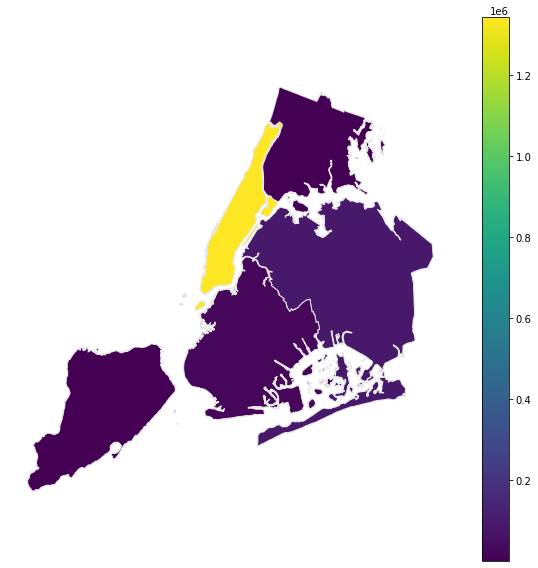

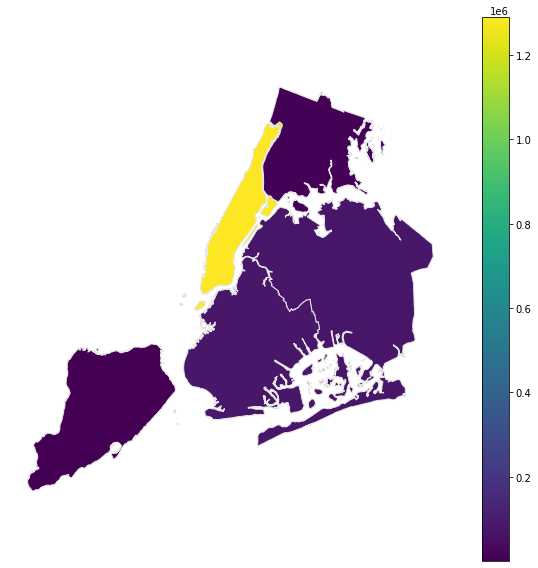

In [ ]:
#for pickup
fig, ax = plt.subplots(1, figsize=(10,10))
PickupShape.plot(column='PickupCount', cmap='viridis', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

#for dropoff
fig1, ax1 = plt.subplots(1, figsize=(10,10))
DropoffShape.plot(column='DropoffCount', cmap='viridis', linewidth=1, ax=ax1, edgecolor='0.9', legend = True)
ax1.axis('off')

In both the chloropleth, manhattan has the highest color, i.e. the largest pickups and dropoff. State Island has the lowest pickups and dropoffs. The difference is seen in Brroklyn. It has less pickups (has a darker shade of purple) and more dropoff (has a lighter more blueish purple).

###3. Which boroughs have the most incoming trips and the most outgoing trips? [2 marks]


In [ ]:
print("Incoming trips per borough: ")
print(DropoffData)

print("Outgoing trips per borough: ")
print(PickUpData)

Incoming trips per borough: 
         Borough    Count
0          Bronx     9353
1       Brooklyn    77272
2      Manhattan  1289656
3         Queens    75877
4  Staten Island      380
Outgoing trips per borough: 
         Borough    Count
0          Bronx     1260
1       Brooklyn    26303
2      Manhattan  1344110
3         Queens    85883
4  Staten Island       61


Manhattan is the borough that has the most incoming and outgoing trips

###4. Which neighbourhood(s) is/are the quietest at night, between midnight and 5AM? (Not everyonewants to party). [2 marks]



In [ ]:
df['pickup_time']= df['pickup_datetime'].dt.hour
df['dropoff_time']= df['dropoff_datetime'].dt.hour

fil1=df['pickup_time']>=0 #midnight
fil2=df['pickup_time']<=5 #5am
fil3=df['dropoff_time']>=0
fil4=df['dropoff_time']<=5
NewDF=df[fil1 & fil2 & fil3 & fil4]
print(NewDF)

                id  vendor_id     pickup_datetime    dropoff_datetime  \
1        id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
14       id2900608          2 2016-05-27 00:43:36 2016-05-27 01:07:10   
20       id2070428          1 2016-02-28 02:23:02 2016-02-28 02:31:08   
22       id2352683          1 2016-04-09 03:34:27 2016-04-09 03:41:30   
43       id3961107          1 2016-03-19 01:12:46 2016-03-19 01:18:49   
...            ...        ...                 ...                 ...   
1458610  id1156695          2 2016-02-27 01:37:32 2016-02-27 01:40:39   
1458618  id1046767          2 2016-04-17 01:46:48 2016-04-17 01:52:55   
1458628  id0986544          2 2016-05-30 03:08:19 2016-05-30 03:14:10   
1458630  id0287353          2 2016-06-25 03:44:32 2016-06-25 03:53:41   
1458638  id1454193          2 2016-02-02 00:39:39 2016-02-02 00:46:33   

         passenger_count  pickup_longitude  pickup_latitude  \
1                      1        -73.980415        40.738564 

In [ ]:
PickupGroupby=NewDF.groupby(NewDF['Pickup_Borough']).count()


DropoffGroupby=NewDF.groupby(NewDF['Dropoff_Borough']).count()


In [ ]:
Count=PickupGroupby['id'][0:5].values
p=PickupGroupby.index[0:5] 
PickUpBoroughs=p.tolist() 
data = {'Borough': PickUpBoroughs,
        'Count': Count}
# Create DataFrame
PickUpData = pd.DataFrame(data)
print("Number of pick ups  in each borough between midnight and 5AM:")
print(PickUpData)


#for dropoff
Count=DropoffGroupby['id'][0:5].values
p=DropoffGroupby.index[0:5] 
DropoffBoroughs=p.tolist() 
data = {'Borough': DropoffBoroughs,
        'Count': Count}
 
# Create DataFrame
DropoffData = pd.DataFrame(data)
print("Number of dropoffs in each borough between midnight and 5AM:")
print(DropoffData) 

print("Added together we have:")
Count=PickupGroupby['id'][0:5].values+DropoffGroupby['id'][0:5].values
data = {'Borough': DropoffBoroughs,
        'Count': Count}
BothData = pd.DataFrame(data)
print(BothData)

Number of pick ups  in each borough between midnight and 5AM:
         Borough   Count
0          Bronx     321
1       Brooklyn    8140
2      Manhattan  150906
3         Queens    8344
4  Staten Island       9
Number of dropoffs in each borough between midnight and 5AM:
         Borough   Count
0          Bronx    2797
1       Brooklyn   22215
2      Manhattan  125246
3         Queens   16551
4  Staten Island      89
Added together we have:
         Borough   Count
0          Bronx    3118
1       Brooklyn   30355
2      Manhattan  276152
3         Queens   24895
4  Staten Island      98


The quietest borough at night is Staten Island. Bronx is also relatively quiet compared to the rest of the boroughs. 

### 5. Which neighbourhood(s) is/are the busiest at night, between midnight and 5AM? (Some people party, well, only Rod actually). [2 marks]

In [ ]:
print(BothData)

         Borough   Count
0          Bronx    3118
1       Brooklyn   30355
2      Manhattan  276152
3         Queens   24895
4  Staten Island      98


The busiest borough is Manhattan, followed by Brooklyn and Queens. 